# Stock Market Analysis

## Get Data
Downloading data from yahoo finance

In [74]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Range of data
Period = "3mo"

# Downloading data
data = yf.download(['MSFT', 'AAPL', 'GOOG'], period=Period)

[*********************100%%**********************]  3 of 3 completed


## Draw Price Charts
Function to draw charts using Y value with plotting of the SMA(15)

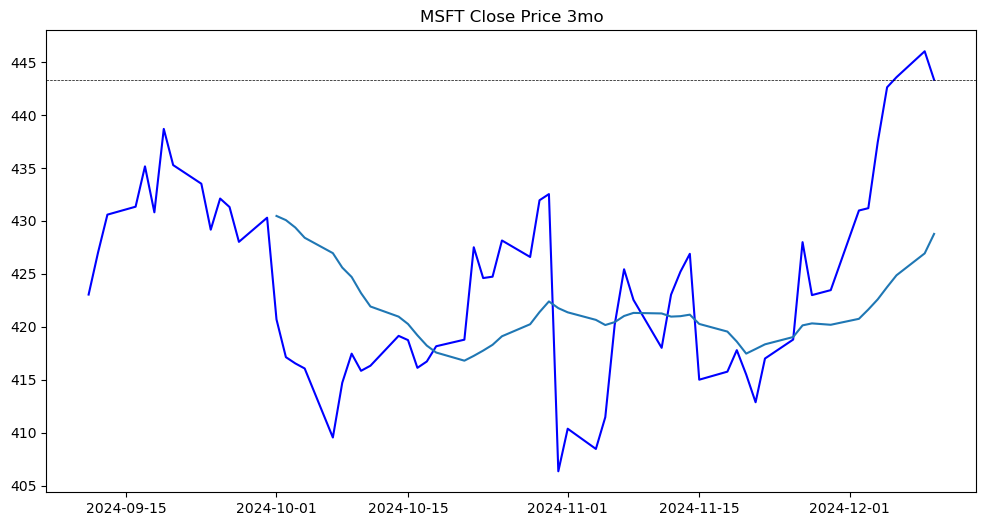

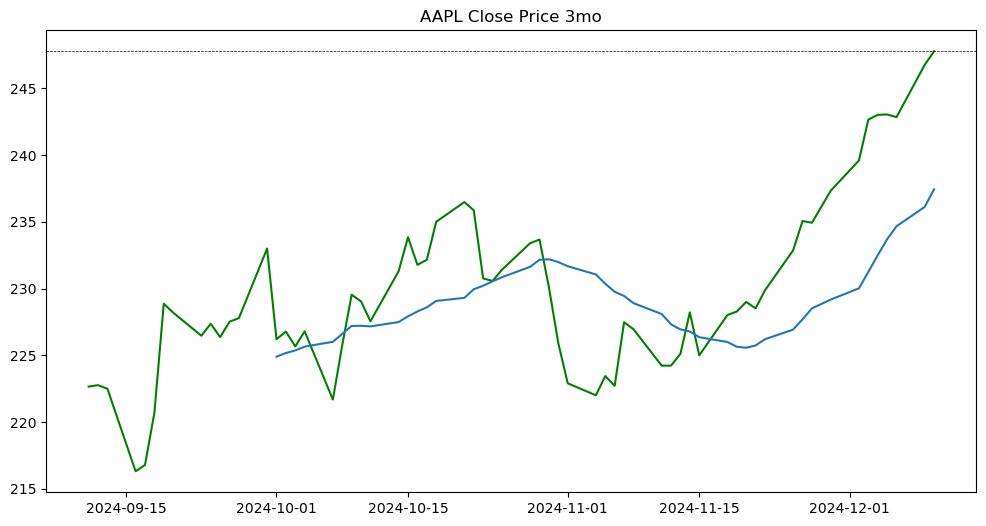

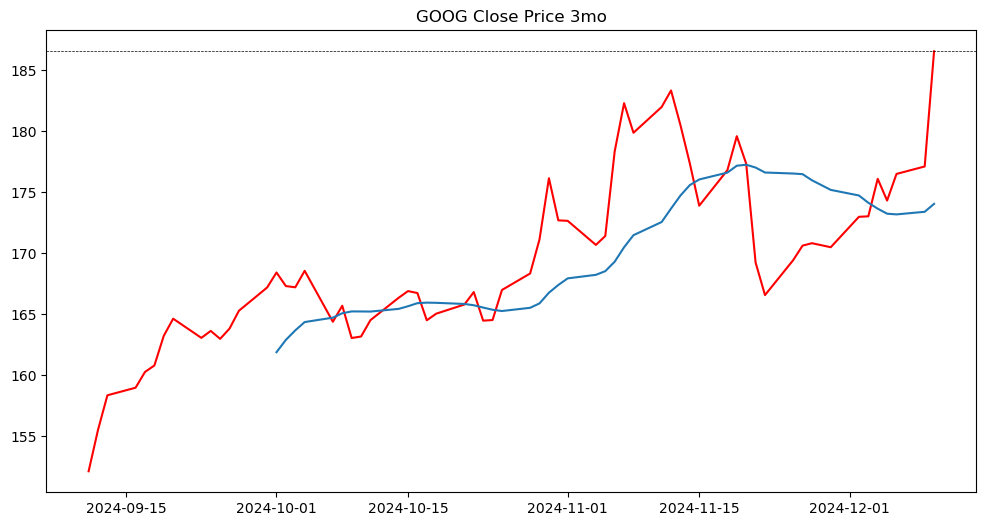

In [78]:
def draw_chart(y, symbol, color, length):
    
    x = data.index
    
    plt.figure(figsize=(12, 6))
    plt.plot(x, y, color)
    plt.title(f"{symbol} Close Price {Period}")
    plt.axhline(y[-1], color='black', linestyle='--', linewidth=0.5)
    
    # Smooth moving AVG
    sma_ = y.rolling(window = length).mean()
    plt.plot(x, sma_)
    
sma_len = 15
draw_chart(data["Close", "MSFT"], "MSFT", "b", sma_len)
draw_chart(data["Close", "AAPL"], "AAPL", "g", sma_len)
draw_chart(data["Close", "GOOG"], "GOOG", "r", sma_len)


## Normalize data with z score normalization function
Allows to see clear deviation of prices from a mean, which helps to analyze price trends

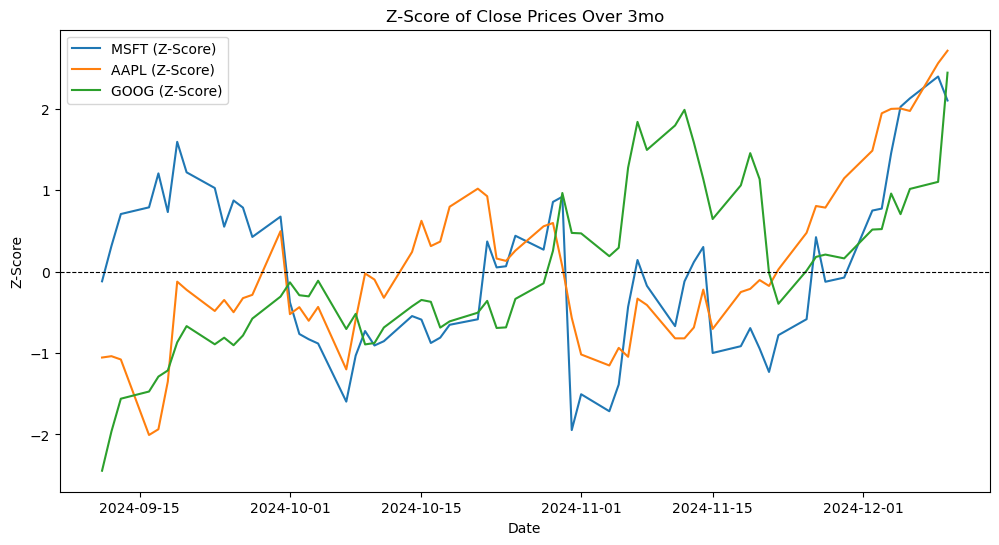

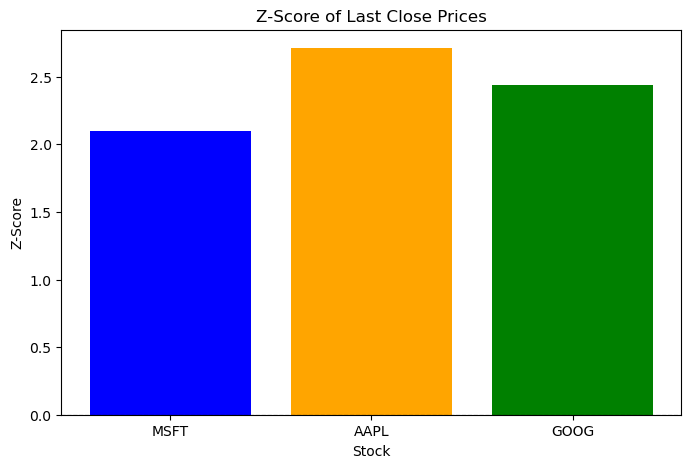

In [76]:
# Z-Score Normalization
data_zscore = data.copy()  # Create a copy of the data

for ticker in ['MSFT', 'AAPL', 'GOOG']:
    data_zscore['Close', ticker] = (data['Close', ticker] - data['Close', ticker].mean()) / data['Close', ticker].std()

last_zscores = {
    'MSFT': data_zscore['Close', 'MSFT'].iloc[-1],
    'AAPL': data_zscore['Close', 'AAPL'].iloc[-1],
    'GOOG': data_zscore['Close', 'GOOG'].iloc[-1]
}
  
# Plot 1: Z-Score Over Time
plt.figure(figsize=(12, 6))
plt.plot(data.index, data_zscore['Close', 'MSFT'], label='MSFT (Z-Score)')
plt.plot(data.index, data_zscore['Close', 'AAPL'], label='AAPL (Z-Score)')
plt.plot(data.index, data_zscore['Close', 'GOOG'], label='GOOG (Z-Score)')
plt.title(f'Z-Score of Close Prices Over {Period}')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at Z=0
plt.legend()
plt.show()    
    
# Plot 2: Histogram of Last Z-Scores
plt.figure(figsize=(8, 5))
plt.bar(last_zscores.keys(), last_zscores.values(), color=['blue', 'orange', 'green'])
plt.title('Z-Score of Last Close Prices')
plt.ylabel('Z-Score')
plt.xlabel('Stock')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # Reference line at Z=0
plt.show()


## Delta Volume Analysis
Receiving volume data from yahoo finance and process it for settled period of time for analysis of bullish and bearish volumes. It helps to track a volume pressure during a set period and predict future prices

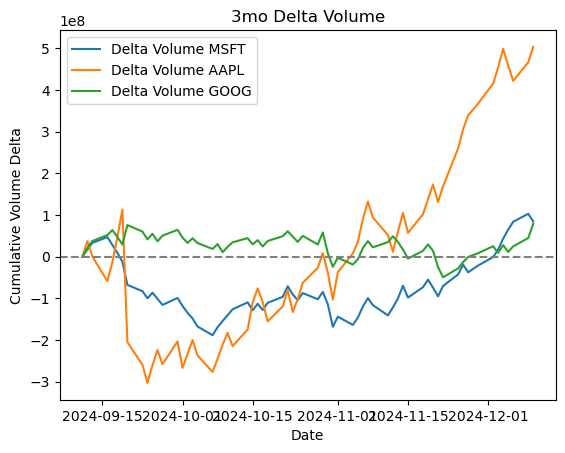

In [77]:
# Defining delta_vol to calculate cumulative delta volume
def delta_vol(volume, close, open_):
    volume_delta = [0]  # Start with 0 for the first value
    for i in range(1, len(volume)):
        if close[i] > open_[i]:  # Bullish
            volume_delta.append(volume_delta[-1] + volume[i])
        else:  # Bearish
            volume_delta.append(volume_delta[-1] - volume[i])
    return volume_delta

# Apply delta_vol function to data
delta_volume_msft = delta_vol(
    data.Volume.MSFT, data.Close.MSFT, data.Open.MSFT
)
delta_volume_aapl = delta_vol(
    data.Volume.AAPL, data.Close.AAPL, data.Open.AAPL
)
delta_volume_goog = delta_vol(
    data.Volume.GOOG, data.Close.GOOG, data.Open.GOOG
)

# Delta
plt.plot(data.index, delta_volume_msft, label='Delta Volume MSFT')
plt.plot(data.index, delta_volume_aapl, label='Delta Volume AAPL')
plt.plot(data.index, delta_volume_goog, label='Delta Volume GOOG')

plt.legend()
plt.title(f'{Period} Delta Volume')
plt.xlabel('Date')
plt.ylabel('Cumulative Volume Delta')
plt.axhline(y=0, color='gray', linestyle='--')

plt.show()